In [33]:
#decision tree classification

from sklearn import tree

x=[[0,0],[1,1]]
y=[0,1]

clf=DecisionTreeClassifier()
clf.fit(x,y)
clf.predict([[5,0]])

array([0])

In [34]:
clf.predict_proba([[0,2]])

array([[0., 1.]])

In [28]:
clf.n_classes_

2

In [29]:
clf.n_features_in_

2

In [30]:
clf.n_outputs_

1

In [31]:
clf.classes_

array([0, 1])

In [46]:
from sklearn.datasets import load_iris

x,y=load_iris(return_X_y=True)
clf=tree.DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier()

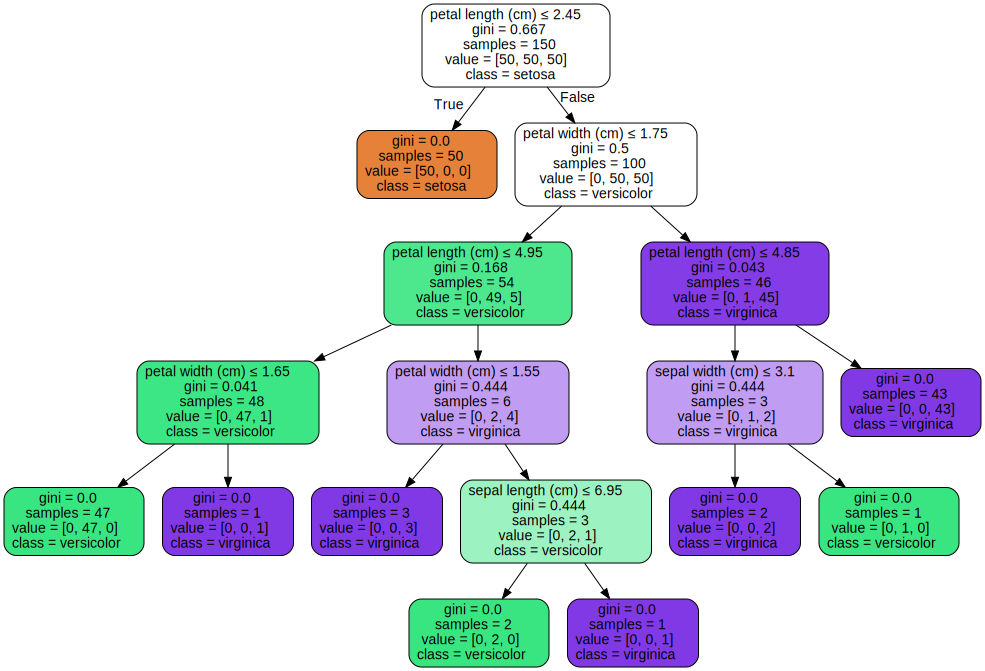

In [57]:
import graphviz

iris=load_iris()
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,
                             filled=True,rounded=True,special_characters=True)

graph=graphviz.Source(dot_data)
graph

In [62]:
iris=load_iris()
clf=tree.DecisionTreeClassifier()
clf.fit(iris.data,iris.target)
tree_text=tree.export_text(clf,feature_names=iris.feature_names,class_names=iris.target_names)
print(tree_text)

|--- petal width (cm) <= 0.80
|   |--- class: setosa
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



(0.0, 7.88, -0.9, 3.4800000000000044)

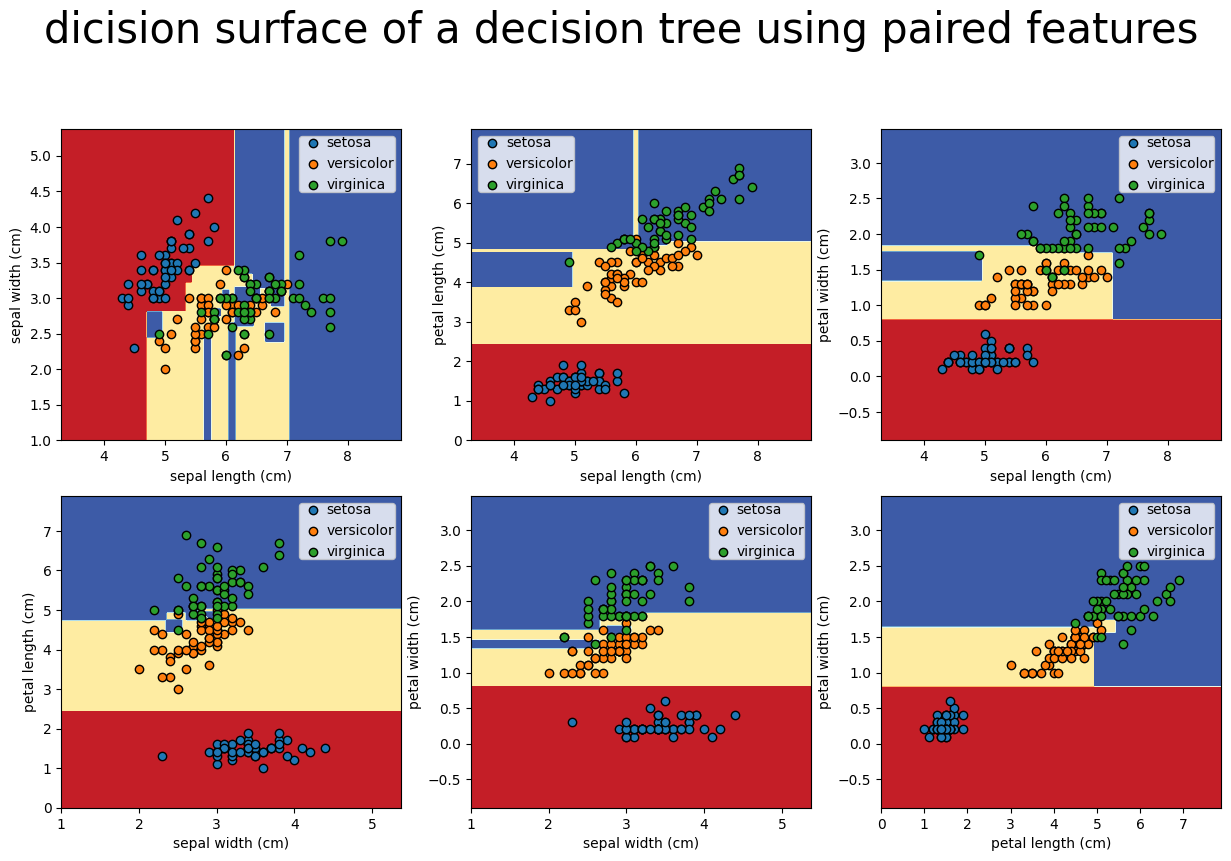

In [125]:
#tree structure of a model built on all of the features

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#parameters
n_classes=3
plot_colors='ryb'
plot_step=.02

iris=load_iris()

plt.figure(figsize=(15,10))

for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    
    #we only take the two corresponding features
    x=iris.data[:,pair]
    y=iris.target
    
    #train data
    clf=tree.DecisionTreeClassifier().fit(x,y)
    
    #plot the decision boundary
    plt.subplot(2,3,pairidx+1)
    plt.tight_layout(h_pad=.5,w_pad=.5,pad=10)
        
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,1].min()-1,x[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,plot_step),np.arange(y_min,y_max,plot_step))
    
    
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    cs=plt.contourf(xx,yy,z,cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    #plot the training points
    for i in range(0,3,1):
        idx=np.where(y==i)
        plt.scatter(x[idx,0],x[idx,1],label=iris.target_names[i],edgecolors='k')
    plt.legend(loc='best', borderpad=0,handletextpad=0)

plt.suptitle('dicision surface of a decision tree using paired features',fontsize=30)
plt.axis('tight')

In [132]:
#decision tree regression

x=[[0,0],[3,3]]
y=[.5,2.5]
clf=tree.DecisionTreeRegressor().fit(x,y)
clf.predict([[2,1]])

array([2.5])

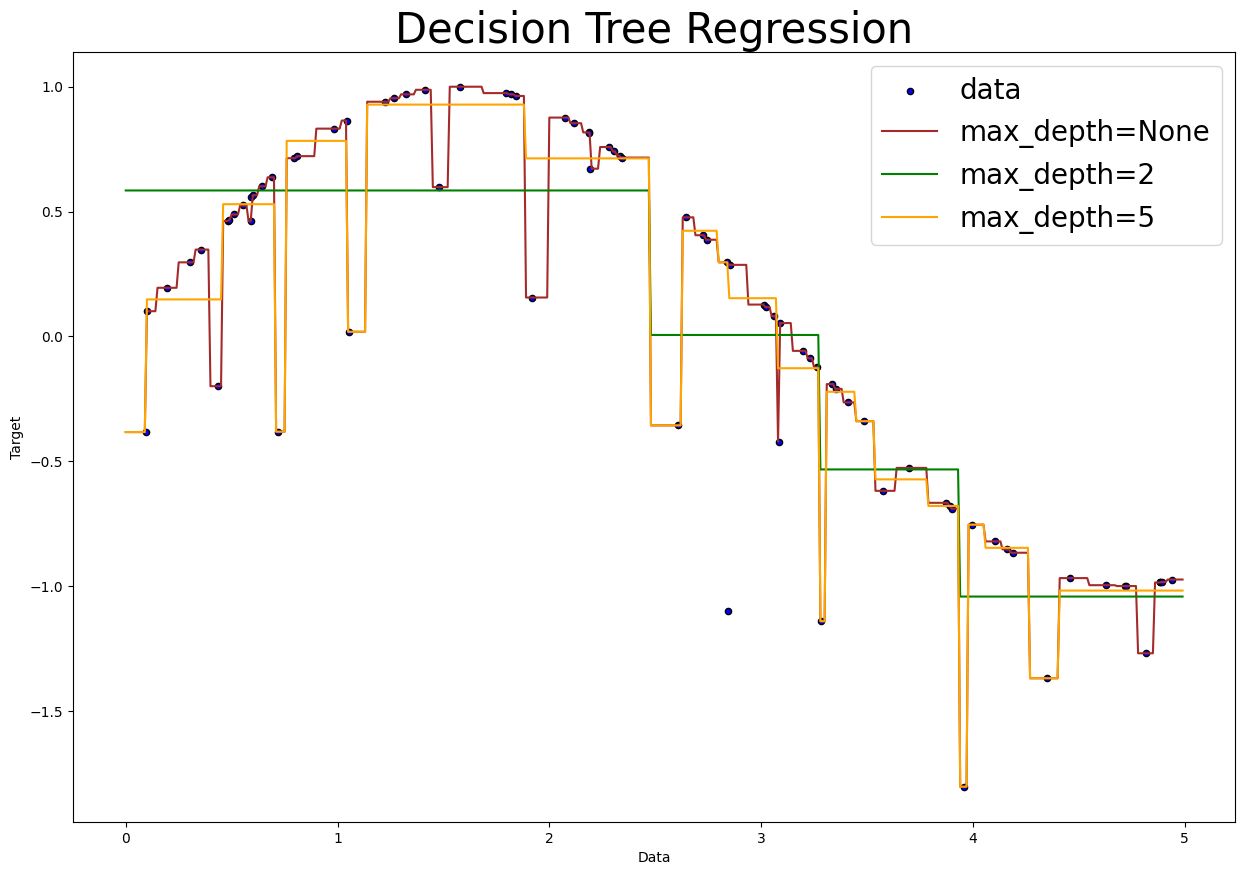

In [259]:
from sklearn.metrics import accuracy_score

#create a random dataset
np.random.seed(10) #this effects on whole numpy random generator class
rng=np.random.RandomState(0) #this effects only on its own class
x=np.sort(5 * rng.rand(80,1),axis=0)
y=np.sin(x).ravel()
y[::5] += 3 * (-.5 * rng.rand(16))
y=y.reshape(-1,1)

#fit regression model
reg1=tree.DecisionTreeRegressor(max_depth=None).fit(x,y)
reg2=tree.DecisionTreeRegressor(max_depth=2).fit(x,y)
reg3=tree.DecisionTreeRegressor(max_depth=5).fit(x,y)

#predict
x_test=np.arange(0,5,0.01)[:,np.newaxis] #reshape(-1,1)
y_pred1=reg1.predict(x_test)
y_pred2=reg2.predict(x_test)
y_pred3=reg3.predict(x_test)

#plot the results
plt.figure(figsize=(15,10))
plt.scatter(x,y,c='b',edgecolors='k',s=20,label='data')
plt.plot(x_test,y_pred1,c='brown',label='max_depth=None')
plt.plot(x_test,y_pred2,c='green',label='max_depth=2')
plt.plot(x_test,y_pred3,c='orange',label='max_depth=5')

plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Decision Tree Regression',size=30)
plt.legend(fontsize=20)


In [224]:
np.arange(0,5,0.01).shape

(500,)

In [225]:
np.arange(0,5,0.01)[:,np.newaxis].shape

(500, 1)

In [229]:
y.shape

(80, 1)

In [231]:
y_pred1.shape

(500,)

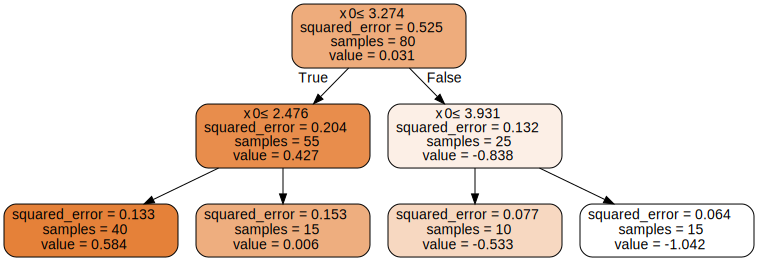

In [272]:
iris=load_iris
dot_data=tree.export_graphviz(reg2,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph



In [271]:
text_data=tree.export_text(reg2)
print(text_data)

|--- feature_0 <= 3.27
|   |--- feature_0 <= 2.48
|   |   |--- value: [0.58]
|   |--- feature_0 >  2.48
|   |   |--- value: [0.01]
|--- feature_0 >  3.27
|   |--- feature_0 <= 3.93
|   |   |--- value: [-0.53]
|   |--- feature_0 >  3.93
|   |   |--- value: [-1.04]

